In [121]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [122]:
import numpy as np
import math
import pandas
import itertools
import random

In [ ]:
data=np.array([[-1, -1 ,1, -1, 1, -1, -1, 1],[-1 ,-1, -1, -1, -1, 1, -1, -1],[-1, 1, 1, -1, -1, 1, -1, 1]])
data

In [ ]:
def hebbiantraining(data):   #function that trains an hopfield network given a data matrix
    N=len(data[0])
    P=len(data[:,0])
    W=np.zeros((N,N))
    for k in range(P):
        for i in range(N):
            for j in range(N):
                W[i,j]+=data[k,i]*data[k,j]
    return W/N
W=hebbiantraining(data)
print(W)

In [ ]:
def recall (x,W):        # function that recalls a pattern given a new vector
    yold=np.random.rand(x.size)
    ynew=x.copy()
    count=0
    while(not np.array_equal(ynew,yold) and count <1000):  #iterazione fino a convergenza o fino a 1000 se non dovesse convergere
        yold=ynew.copy()
        ynew=np.sign(W @ yold.T)
        count+=1
       

    return ynew

print(recall(data[0],W))
print(recall(data[1],W))
print(recall(data[2],W))


In [ ]:
# Task 1
datadist=np.array([[ 1 ,-1, 1, -1, 1, -1, -1, 1],[ 1, 1, -1, -1, -1, 1, -1, -1],[ 1, 1, 1, -1, 1, 1, -1, 1]])
print(datadist)
print(recall(datadist[0],W))
print(recall(datadist[1],W))
print(recall(datadist[2],W))
print(data)

In [ ]:
combinazioni=list(itertools.product([-1,1],repeat=8))  #tutte le possibili combinazioni di -1 e 1
attractors=[]
for x in combinazioni:
    x=np.array(x)
    if np.array_equal(recall(x,W),x):     # x è un attrattore se è un punto fisso della funzione recall
        attractors.append(x)
attractors=np.array(attractors)
print(attractors)      # 10 attrattori

In [ ]:
x2dist=np.array([1,1,1,1,1,1,-1,-1])# i primi 5 numeri sono sbagliati
print(recall(x2dist,W))   #finisce in un altro attrattore, diverso da quelli usati in training

In [ ]:
#Task 2
p=np.loadtxt('pict.dat', delimiter=',')
p=p.reshape(11,1024)
p1=p[0]
p2=p[1]
p3=p[2]
p4=p[3]
p5=p[4]
p6=p[5]
p7=p[6]
p8=p[7]
p9=p[8]
p10=p[9]
p11=p[10]
plt.rcParams['text.usetex'] = False
def showpicture(p):
    p_image=p.reshape(32,32)
    plt.imshow(p_image,cmap='gray',vmin=-1,vmax=1)
    plt.show()
showpicture(p1)

In [130]:
training_data=np.array([p1,p2,p3])
W= hebbiantraining(training_data)


In [ ]:
showpicture(p1)
showpicture(recall(p1,W)) #recovered pattern

In [ ]:
showpicture(p1)
showpicture(p10)
showpicture(recall(p10,W)) #pattern recovered

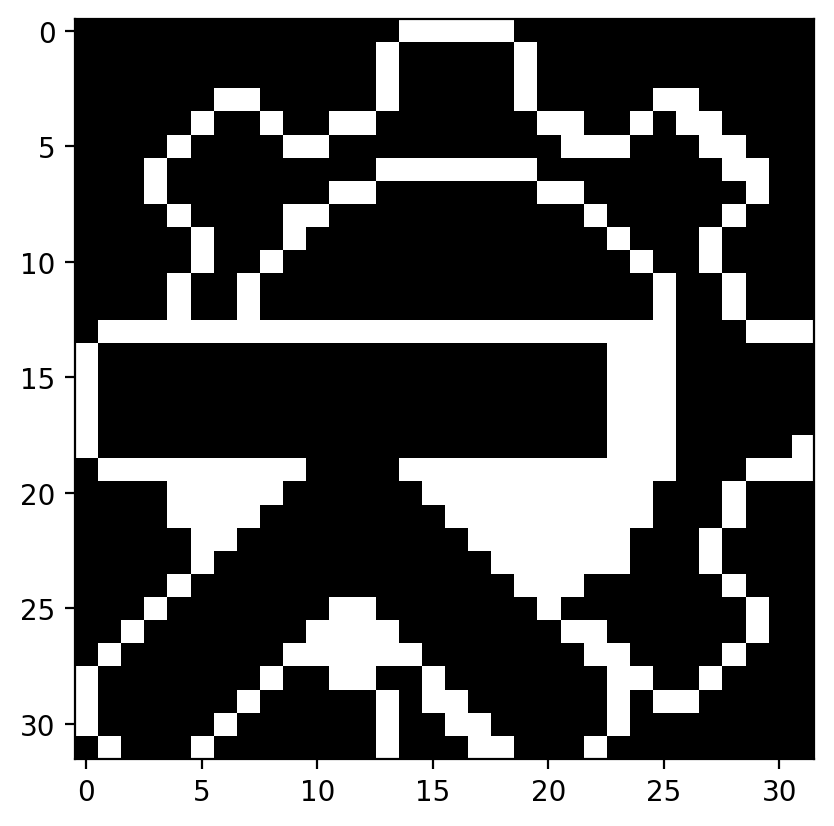

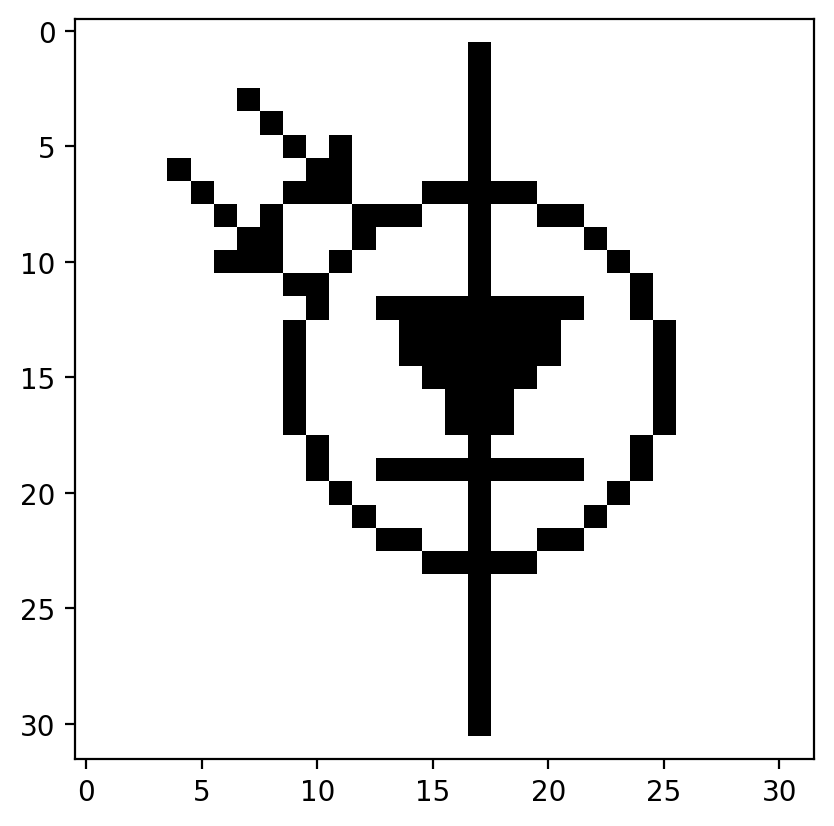

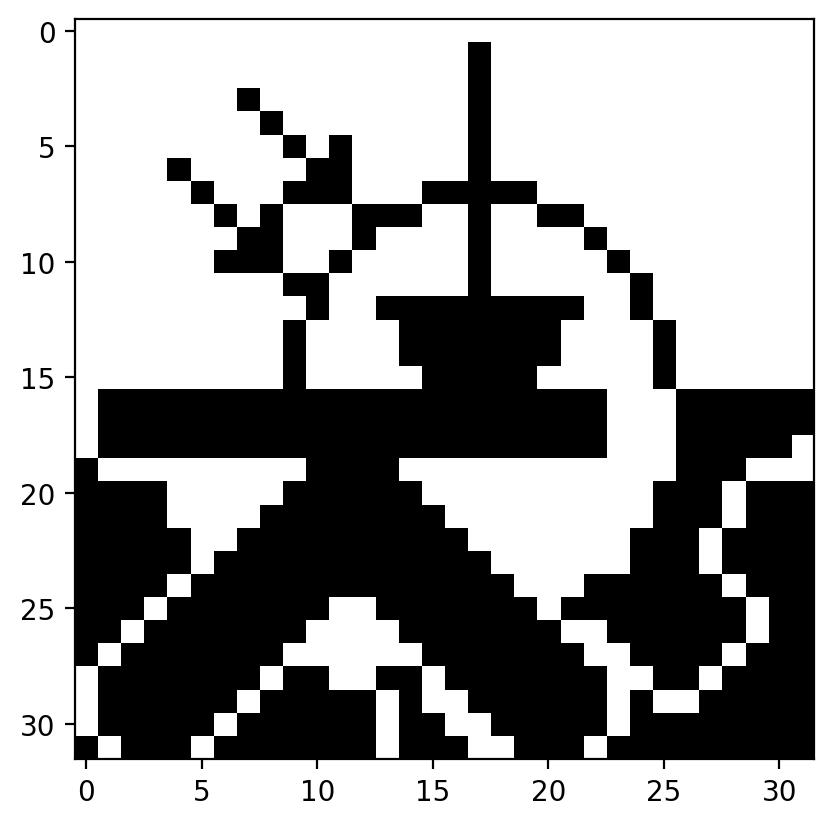

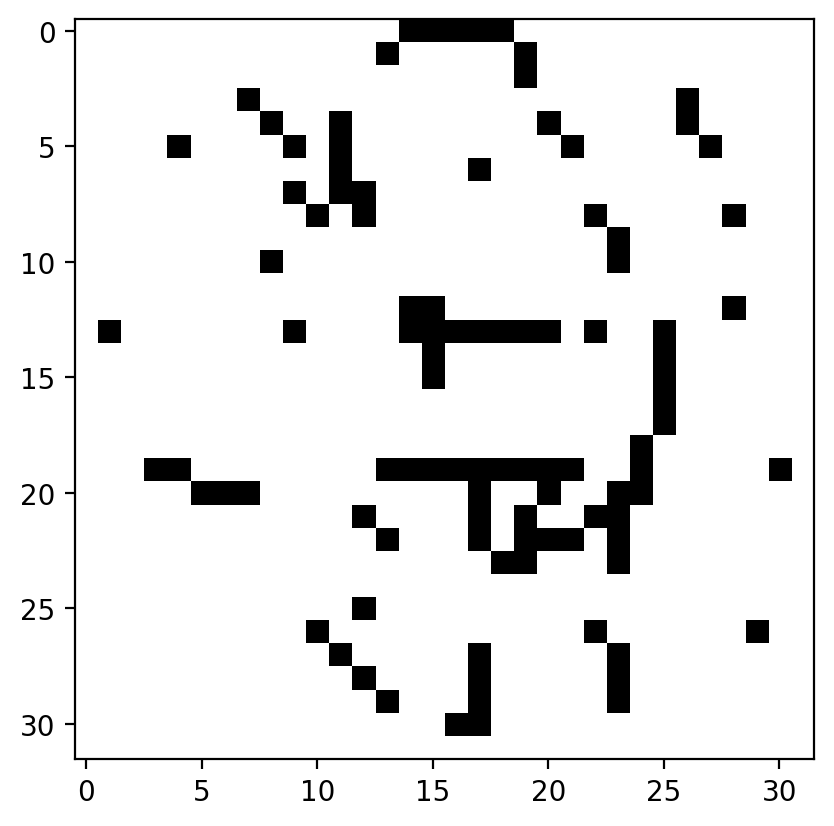

In [164]:
showpicture(p2)
showpicture(p3)
showpicture(p11)
showpicture(recall(p11,W)) #pattern NOT recovered

In [ ]:

def seqrecall(x,W):
    yold=np.random.rand(x.size)
    ynew=x.copy()
    count=0
    while(not np.array_equal(ynew,yold) and count <10000):  #iterazione fino a convergenza o fino a 1000 se non dovesse convergere
        yold=ynew.copy()
        picture_count=0
        for i in random.sample(range(len(x)),len(x)):   # ATTENZIONE!!!!: RIPETENDO DIVERSE VOLTE SI FINISCE IN DIVERSI ATTRATTORI, TOGLIENDO IL SAMPLING SI FINISCE IN P2 
            ynew[i] = np.sign(np.dot(W[i],ynew))
            if picture_count % 200 == 0:
                showpicture(ynew)
            picture_count+=1
            
        count+=1
    print(count)
    return ynew

showpicture(seqrecall(p11,W))
showpicture(p11)

Energia p1: -1439.390625
Energia p2: -1365.640625
Energia p3: -1462.25


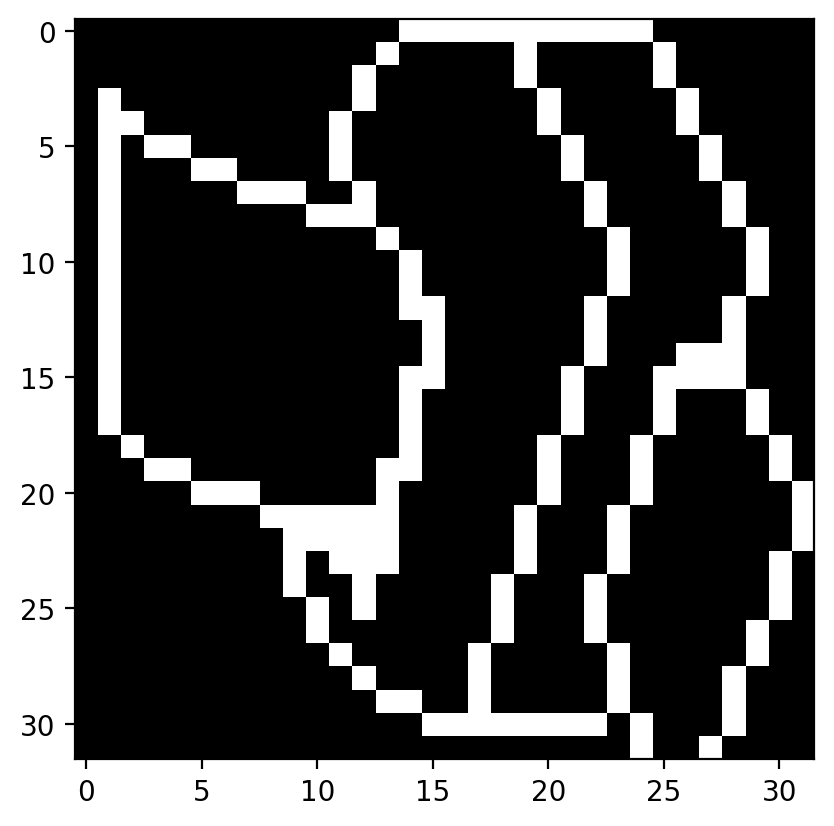

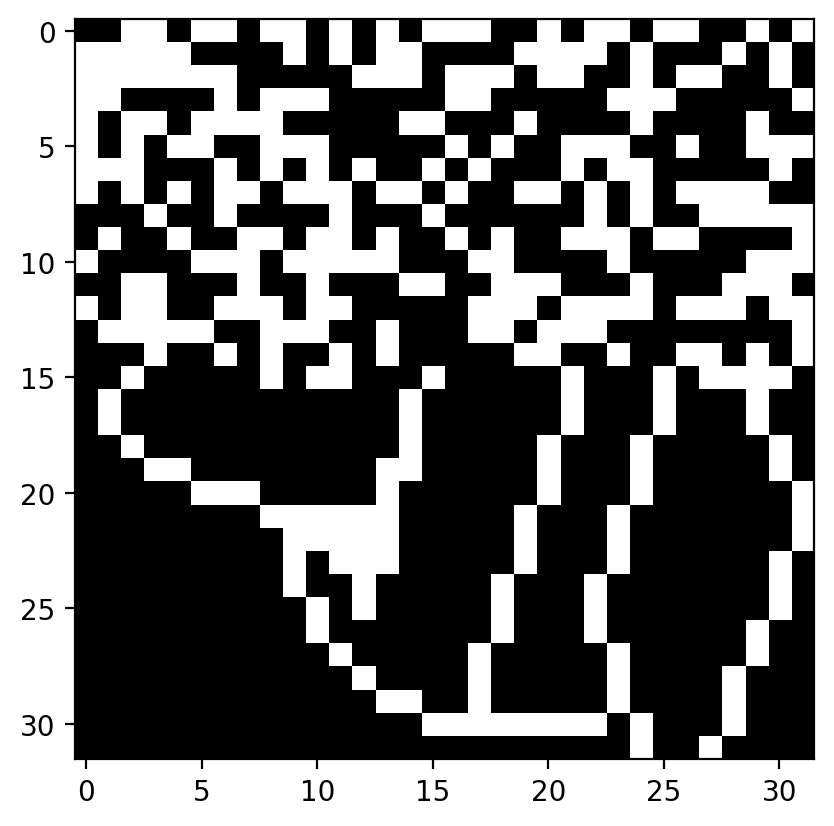

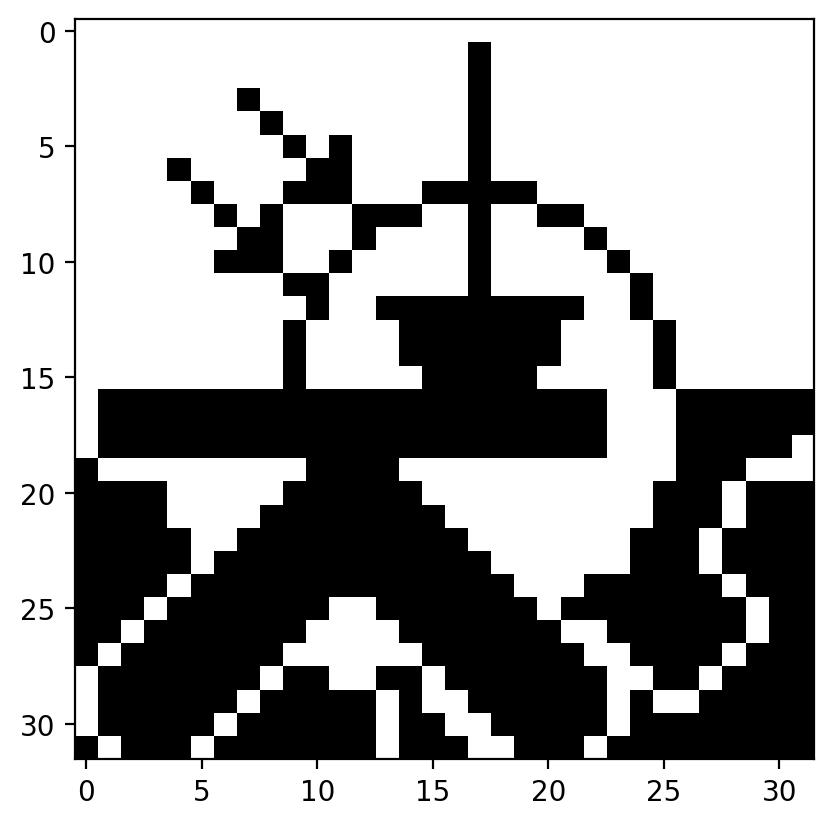


Pattern distorto p10:
 - Energia iniziale: -415.98046875
Convergenza dopo 2 iterazioni
 - Energia finale dopo il richiamo: -1439.390625


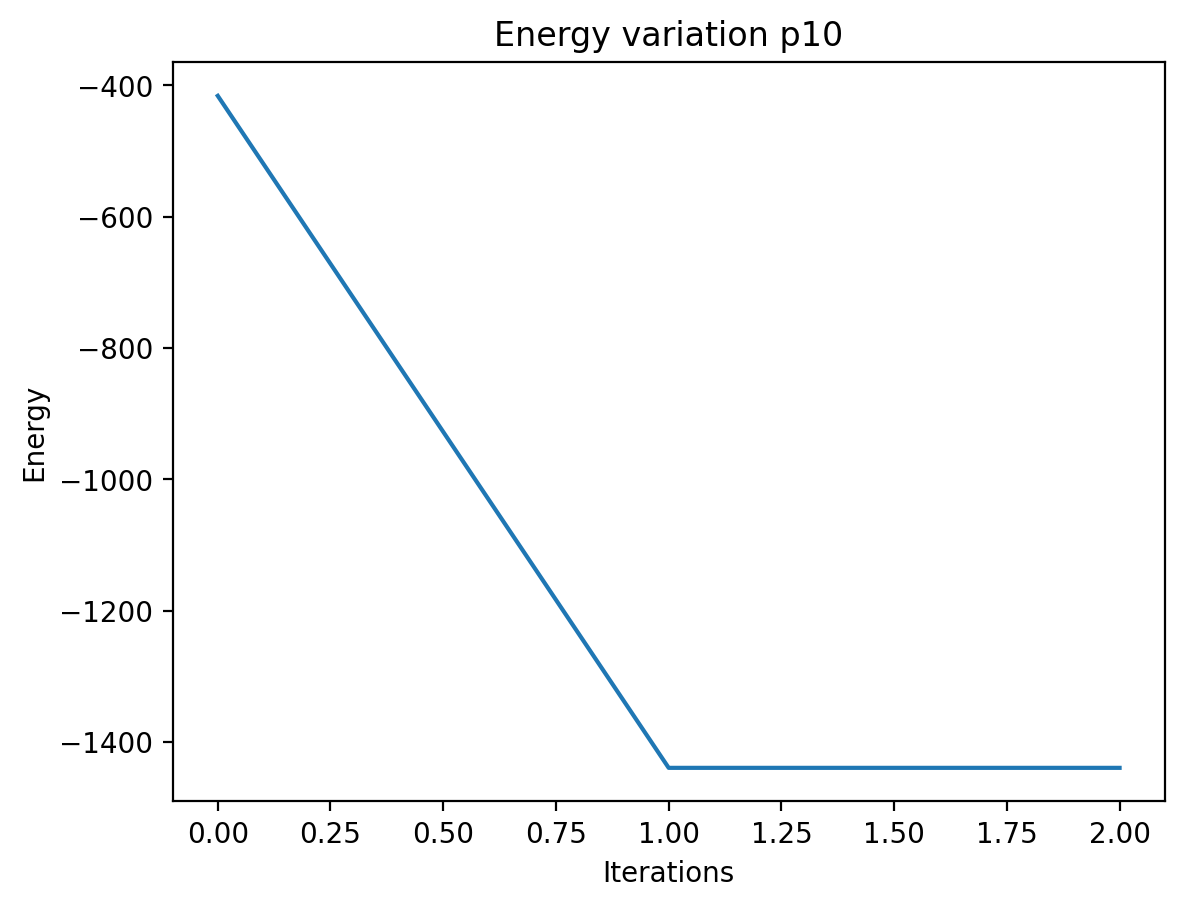


Pattern distorto p11:
 - Energia iniziale: -173.5
Convergenza dopo 3 iterazioni


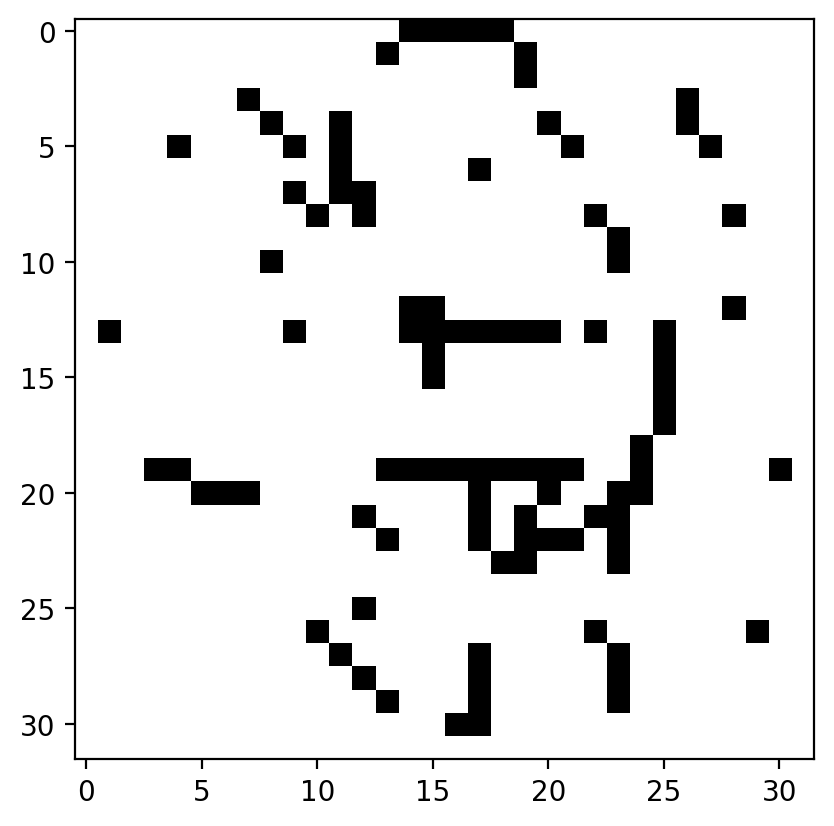

 - Energia finale dopo il richiamo: -1596.01171875


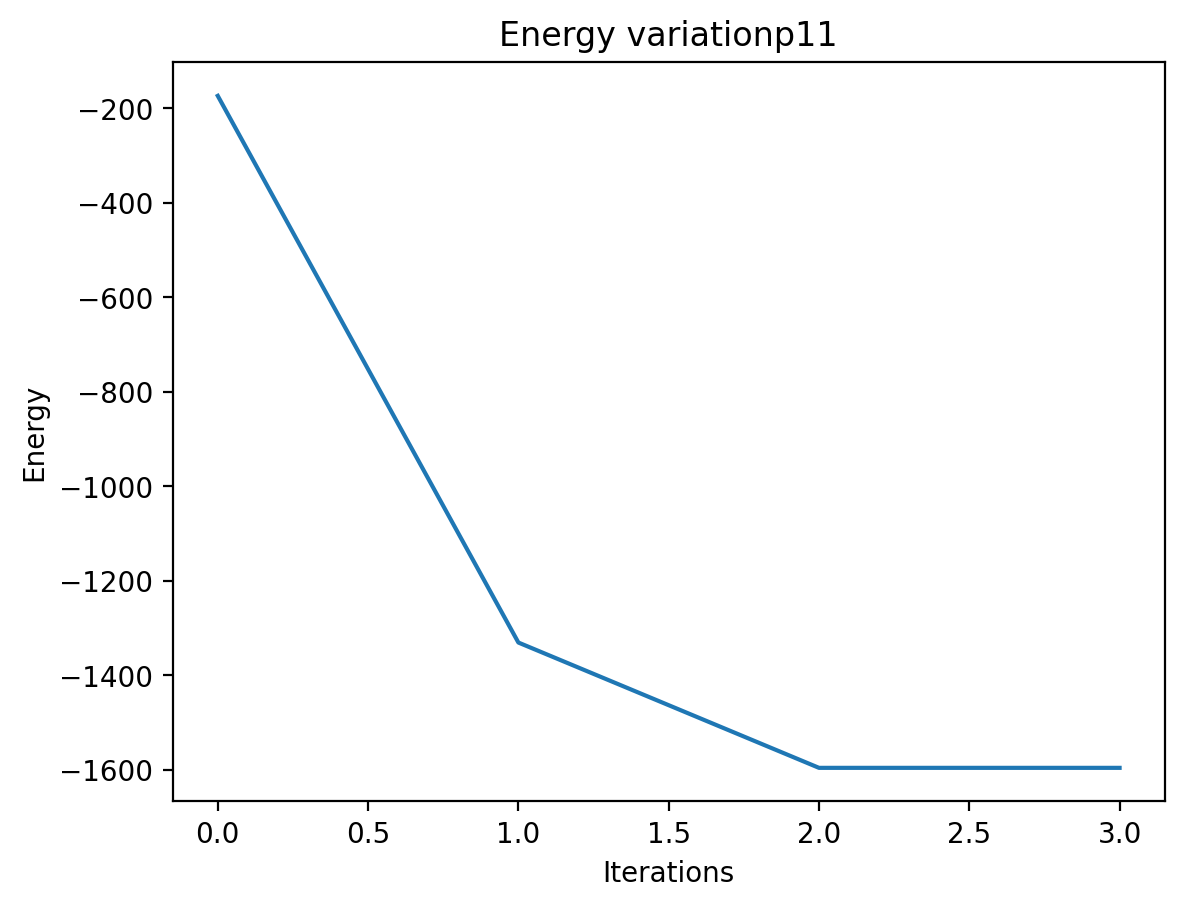

In [20]:
##TASK 3 (1-2-3 )
# Funzione per calcolare l'energia della rete Hopfield
def calculate_energy(x, W):
    return -np.dot(x.T, np.dot(W, x))

energy_p1 = calculate_energy(p1,W)
energy_p2 = calculate_energy(p2,W)
energy_p3 = calculate_energy(p3,W)
print(f"Energia p1: {energy_p1}")
print(f"Energia p2: {energy_p2}")
print(f"Energia p3: {energy_p3}")


# Funzione per richiamare un pattern e monitorare l'energia
def seqrecall_with_energy(x, W):
    yold = np.random.rand(x.size)
    ynew = x.copy()
    count = 0
    energy_list = []  # Lista per tracciare l'energia ad ogni iterazione
    energy = calculate_energy(ynew, W)
    energy_list.append(energy)
    while not np.array_equal(ynew, yold) and count < 10000:  # Iterazione fino a convergenza
        yold = ynew.copy()
        for i in random.sample(range(len(x)), len(x)):  # Aggiornamento sequenziale casuale
            # Calcolo dell'energia
            ynew[i] = np.sign(np.dot(W[i], ynew))
        energy = calculate_energy(ynew, W)
        energy_list.append(energy)
        count += 1
    

    print(f"Convergenza dopo {count} iterazioni")
    return ynew, energy_list

# Funzione per visualizzare l'andamento dell'energia durante il richiamo
def plot_energy(energy_list, title):
    plt.plot(energy_list)
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    plt.title(title)
    plt.show()

# Visualizza il pattern originale e distorto
showpicture(p1)
showpicture(p10)
showpicture(p11)

# Calcola e visualizza l'energia per il pattern distorto p10
print("\nPattern distorto p10:")
initial_energy_p10 = calculate_energy(p10, W)
print(f" - Energia iniziale: {initial_energy_p10}")

recalled_p10, energy_list_p10 = seqrecall_with_energy(p10, W)
final_energy_p10 = calculate_energy(recalled_p10, W)
print(f" - Energia finale dopo il richiamo: {final_energy_p10}")

# Mostra l'andamento dell'energia per p10
plot_energy(energy_list_p10, 'Energy variation p10')

# Calcola e visualizza l'energia per il pattern distorto p11
print("\nPattern distorto p11:")
initial_energy_p11 = calculate_energy(p11, W)
print(f" - Energia iniziale: {initial_energy_p11}")

recalled_p11, energy_list_p11 = seqrecall_with_energy(p11, W)
showpicture(recalled_p11)
final_energy_p11 = calculate_energy(recalled_p11, W)
print(f" - Energia finale dopo il richiamo: {final_energy_p11}")

# Mostra l'andamento dell'energia per p11
plot_energy(energy_list_p11, 'Energy variationp11')

Matrice di pesi casuali (non simmetrica):
[[ 0.          0.56130358  0.8550652  ... -0.10572775  0.1977031
  -1.64231938]
 [-0.24898263  0.          0.45121313 ...  0.19614194 -0.01823783
  -0.27217991]
 [-0.10469845 -0.09649726  0.         ... -1.3801877  -2.13019255
  -0.39740584]
 ...
 [ 0.1857156   0.37537395 -1.34674621 ...  0.         -1.03219087
   0.64224443]
 [-0.65837468  1.0901925   0.33911505 ... -0.44121246  0.
  -1.28411787]
 [ 0.25548812 -1.18522427 -0.14311793 ...  0.5676943  -0.11045298
   0.        ]]

Richiamo con matrice casuale non simmetrica:
Convergenza dopo 10000 iterazioni


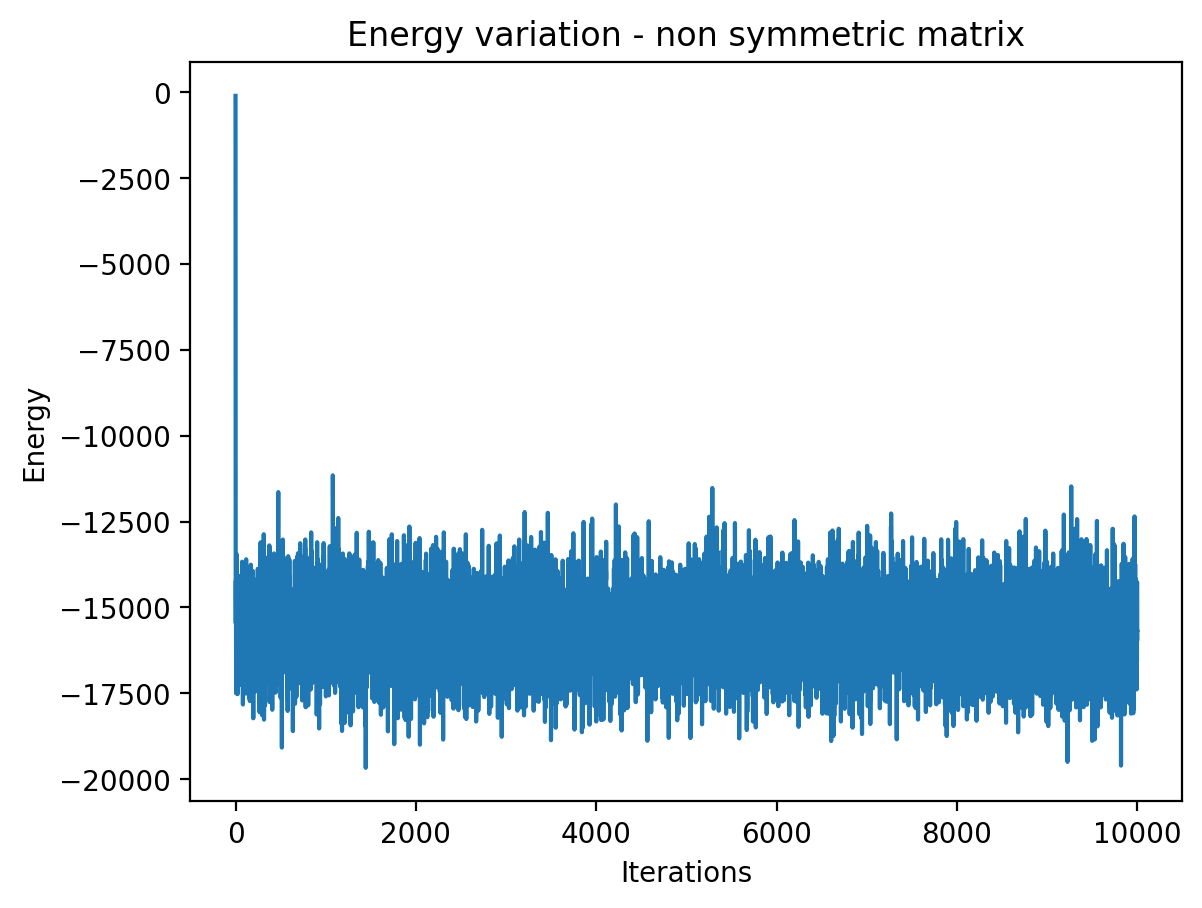

Matrice di pesi simmetrica:
[[ 0.          0.15616047  0.37518337 ...  0.03999393 -0.23033579
  -0.69341563]
 [ 0.15616047  0.          0.17735793 ...  0.28575795  0.53597734
  -0.72870209]
 [ 0.37518337  0.17735793  0.         ... -1.36346695 -0.89553875
  -0.27026189]
 ...
 [ 0.03999393  0.28575795 -1.36346695 ...  0.         -0.73670167
   0.60496937]
 [-0.23033579  0.53597734 -0.89553875 ... -0.73670167  0.
  -0.69728543]
 [-0.69341563 -0.72870209 -0.27026189 ...  0.60496937 -0.69728543
   0.        ]]

Richiamo con matrice simmetrica:
Convergenza dopo 20 iterazioni


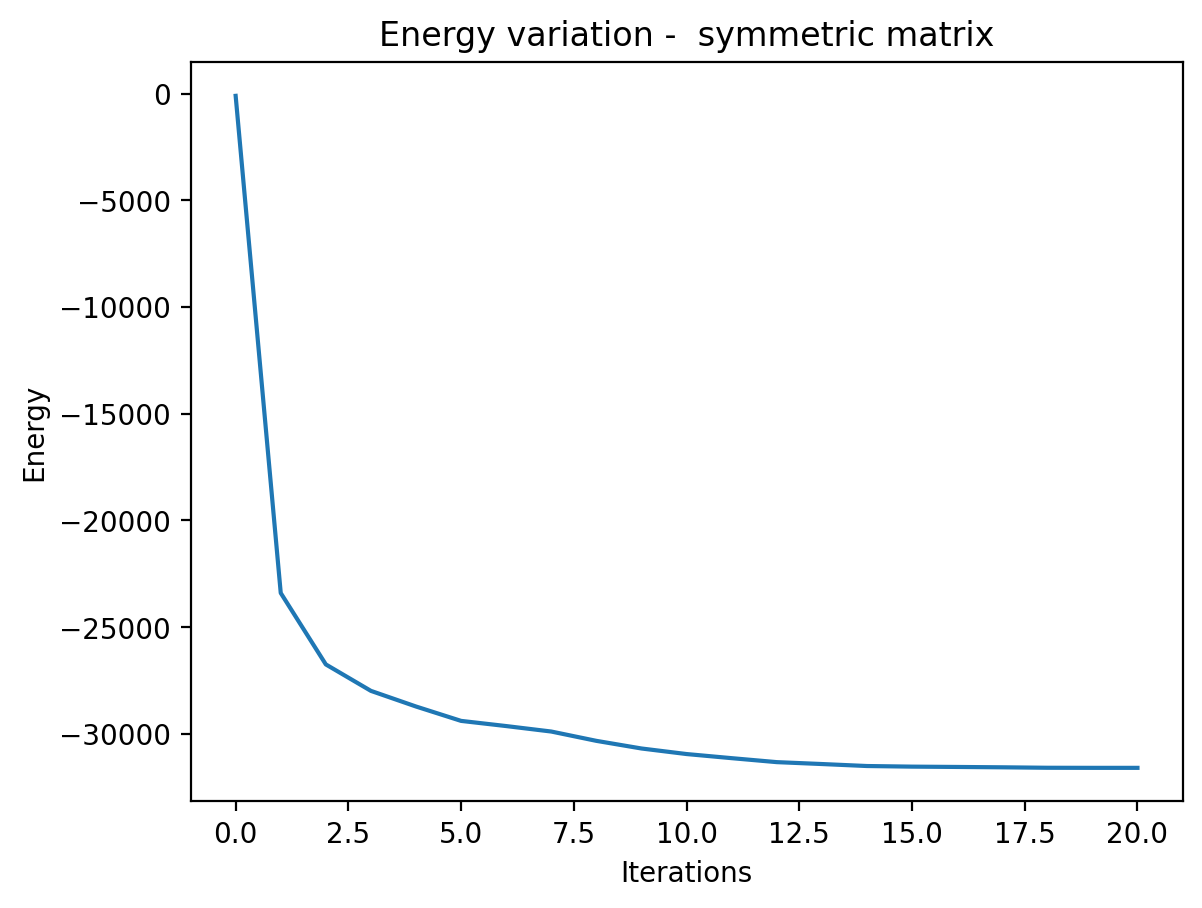

In [21]:
#TASK 3 4-5 

# Funzione per generare una matrice di pesi casuali
def generate_random_weight_matrix(size):
    W_random = np.random.randn(size, size)  # Genera numeri casuali con distribuzione normale
    np.fill_diagonal(W_random, 0)  # Rimuove i self-connection (diagonale)
    return W_random

# Funzione per rendere una matrice simmetrica
def make_symmetric(W):
    return 0.5 * (W + W.T)  # Trasforma la matrice in simmetrica

# Test con matrice di pesi casuali e stato iniziale arbitrario
def test_random_weights(size):
    W_random = generate_random_weight_matrix(size) ## NON CONVERGE
    print("Matrice di pesi casuali (non simmetrica):")
    print(W_random)

    # Stato iniziale arbitrario (random pattern)
    x_init = np.random.choice([-1, 1], size)

    # Richiamo con la matrice casuale non simmetrica
    #in una rete con matrice di pesi non simmetrica, non esiste una funzione di energia che garantisca una diminuzione costante verso
    # un attrattore. Questo porta a un comportamento caotico, in cui la rete può continuare a variare indefinitamente tra diversi stati,
    #  senza mai stabilizzarsi completamente.
    print("\nRichiamo con matrice casuale non simmetrica:")
    recalled_x, energy_list_random = seqrecall_with_energy(x_init, W_random)
    plot_energy(energy_list_random, 'Energy variation - non symmetric matrix')

    # Rendi la matrice simmetrica
    W_symmetric = make_symmetric(W_random)
    print("Matrice di pesi simmetrica:")
    print(W_symmetric)

    # Richiamo con la matrice simmetrica
    print("\nRichiamo con matrice simmetrica:")
    recalled_x_sym, energy_list_symmetric = seqrecall_with_energy(x_init, W_symmetric)
    plot_energy(energy_list_symmetric, 'Energy variation -  symmetric matrix')

# Esegui il test con matrice di pesi casuali
test_random_weights(1024)  # Per esempio, una matrice di 1024 neuroni


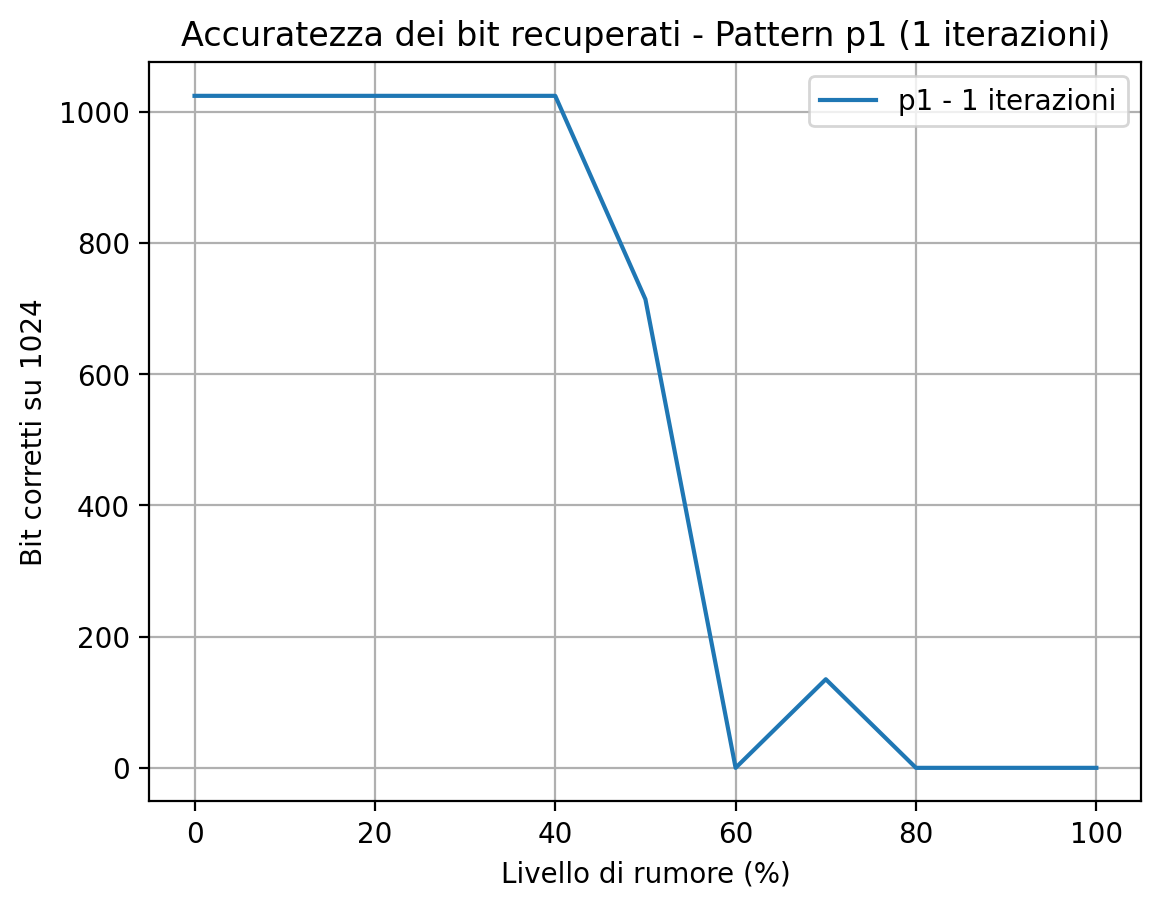

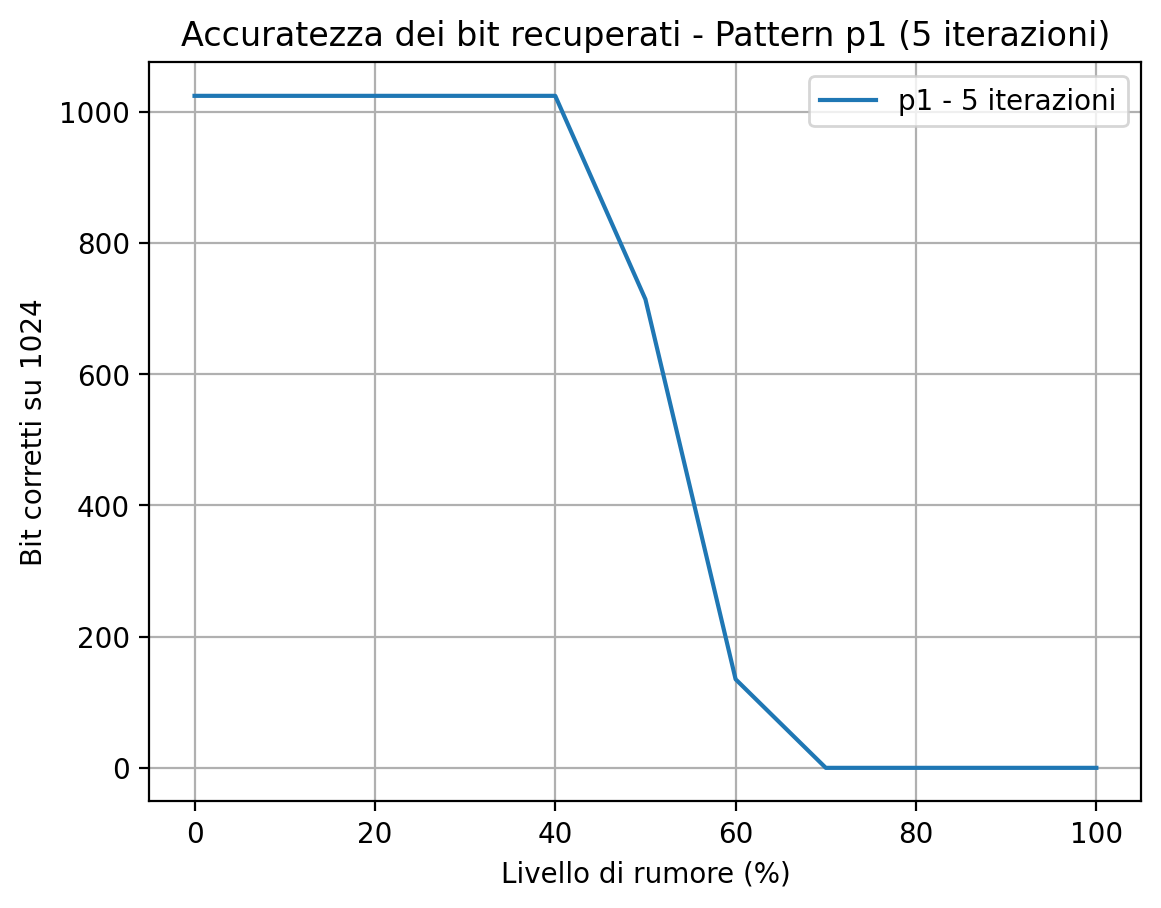

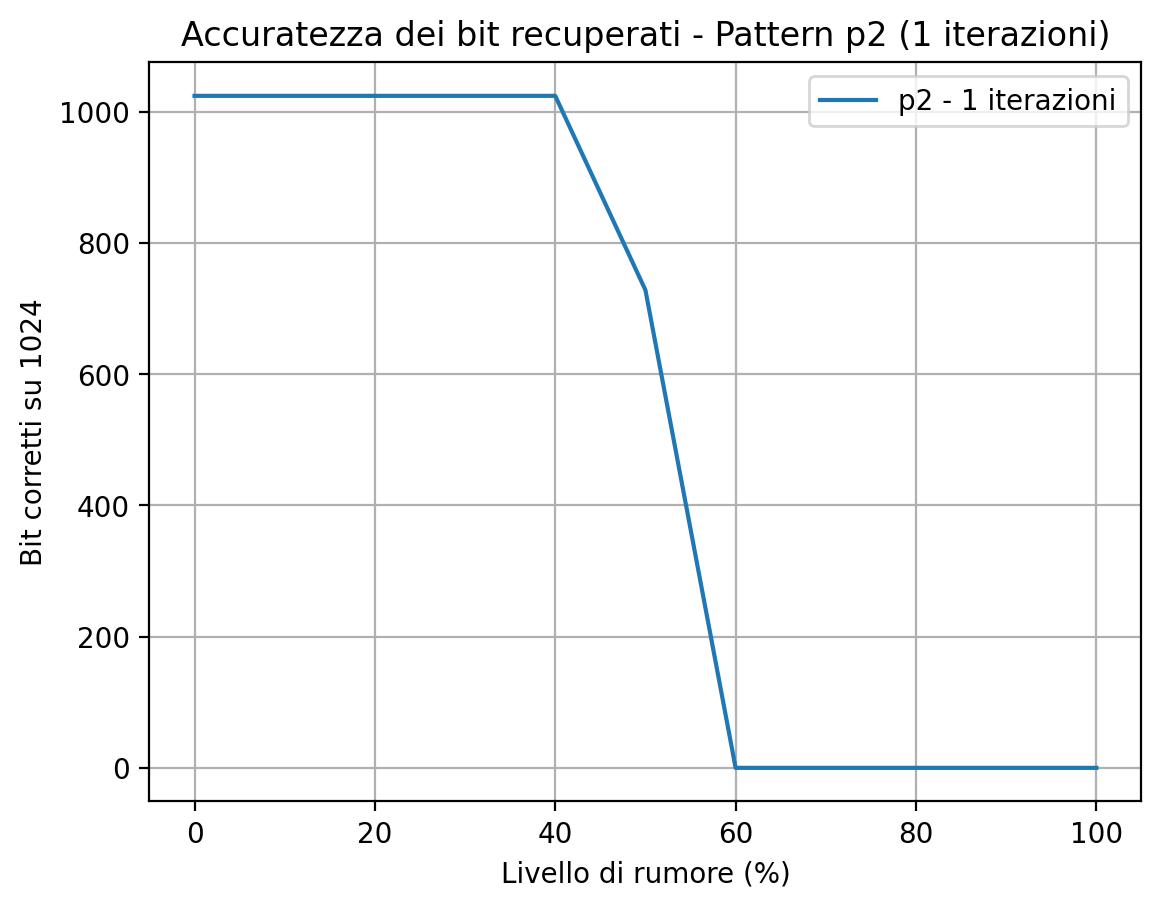

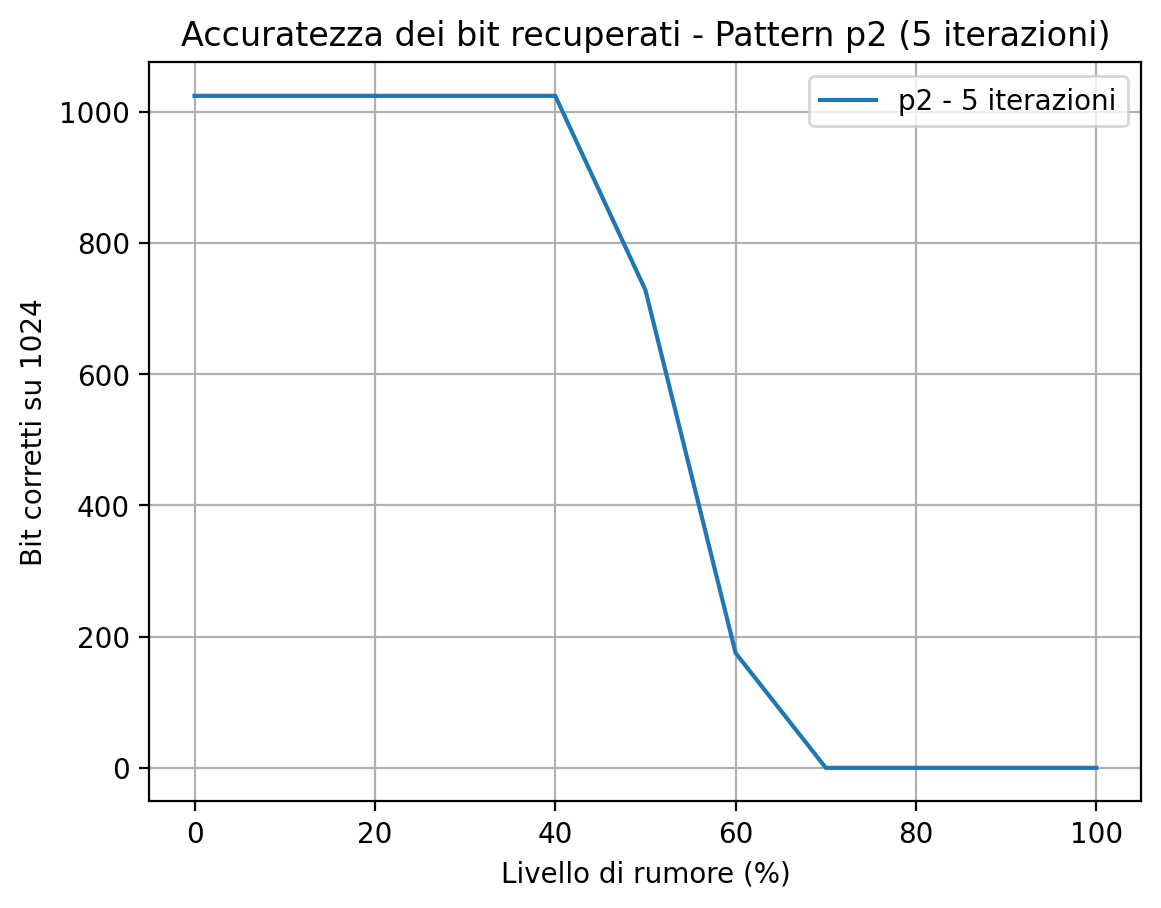

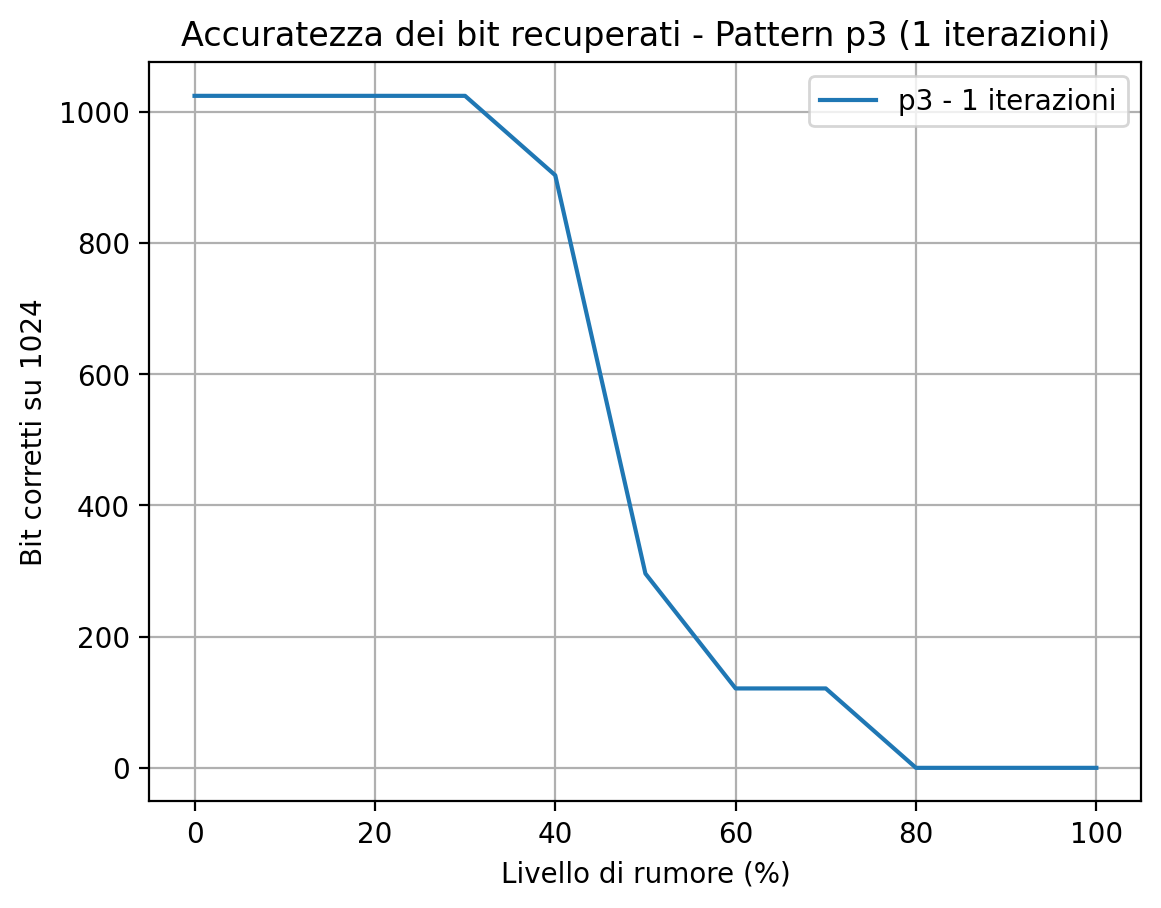

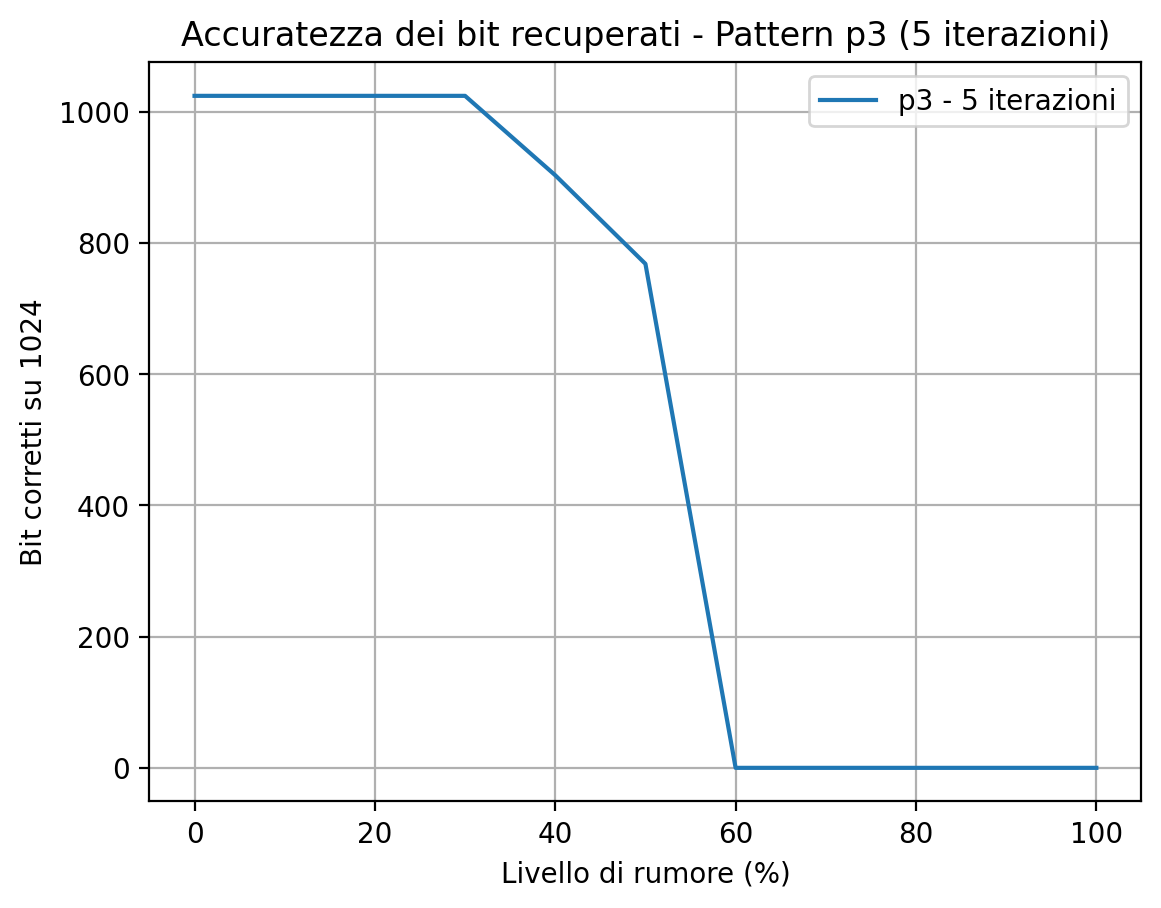

In [22]:
# Funzione per aggiungere rumore a un pattern (flipping random bits)
def add_noise(pattern, noise_level):
    noisy_pattern = pattern.copy()
    flip_indices = np.random.choice(len(pattern), size=int(noise_level * len(pattern)), replace=False)
    noisy_pattern[flip_indices] = -noisy_pattern[flip_indices]  # Flippa i bit selezionati
    return noisy_pattern

# Funzione per l'aggiornamento sincrono (Modello di Little)
def little_model_update(x, W, iterations=10):
    for _ in range(iterations):
        x = np.sign(np.dot(W, x))
    return x

# Funzione per testare la resistenza al rumore e calcolare l'accuratezza (numero di bit corretti)
def test_noise_resistance_bits(W, pattern, noise_levels, iterations=1):
    bit_accuracy_list = []

    for noise_level in noise_levels:
        noisy_pattern = add_noise(pattern, noise_level)  # Aggiungi rumore al pattern
        restored_pattern = little_model_update(noisy_pattern, W, iterations)  # Richiama il pattern
        
        # Calcola quanti bit sono corretti dopo il recupero
        correct_bits = np.sum(restored_pattern == pattern)
        bit_accuracy_list.append(correct_bits)
    
    return bit_accuracy_list

# Funzione per tracciare i risultati (accuratezza in termini di bit corretti)
def plot_bit_accuracy(noise_levels, bit_accuracy_list, pattern_name, iterations, pattern_length):
    plt.plot(noise_levels, bit_accuracy_list, label=f"{pattern_name} - {iterations} iterazioni")
    plt.xlabel('Livello di rumore (%)')
    plt.ylabel(f'Bit corretti su {pattern_length}')
    plt.title(f'Accuratezza dei bit recuperati - Pattern {pattern_name} ({iterations} iterazioni)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Livelli di rumore da 0% a 100% (in passi di 10%)
noise_levels = np.linspace(0, 1, 11)  # 0%, 10%, 20%, ..., 100%

# Lunghezza del pattern
pattern_length = len(p1)

# Testa la resistenza al rumore con un singolo passo e con 10 iterazioni

# Test per p1 - 1 iterazione
bit_accuracy_p1_single_step = test_noise_resistance_bits(W, p1, noise_levels, iterations=1)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p1_single_step, 'p1', 1, pattern_length)

# Test per p1 - 10 iterazioni
bit_accuracy_p1_multiple_steps = test_noise_resistance_bits(W, p1, noise_levels, iterations=10)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p1_multiple_steps, 'p1', 5, pattern_length)

# Puoi ripetere lo stesso processo per p2 e p3:

# Test per p2 - 1 iterazione
bit_accuracy_p2_single_step = test_noise_resistance_bits(W, p2, noise_levels, iterations=1)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p2_single_step, 'p2', 1, pattern_length)

# Test per p2 - 10 iterazioni
bit_accuracy_p2_multiple_steps = test_noise_resistance_bits(W, p2, noise_levels, iterations=10)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p2_multiple_steps, 'p2', 5, pattern_length)

# Test per p3 - 1 iterazione
bit_accuracy_p3_single_step = test_noise_resistance_bits(W, p3, noise_levels, iterations=1)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p3_single_step, 'p3', 1, pattern_length)

# Test per p3 - 10 iterazioni
bit_accuracy_p3_multiple_steps = test_noise_resistance_bits(W, p3, noise_levels, iterations=10)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p3_multiple_steps, 'p3', 5, pattern_length)


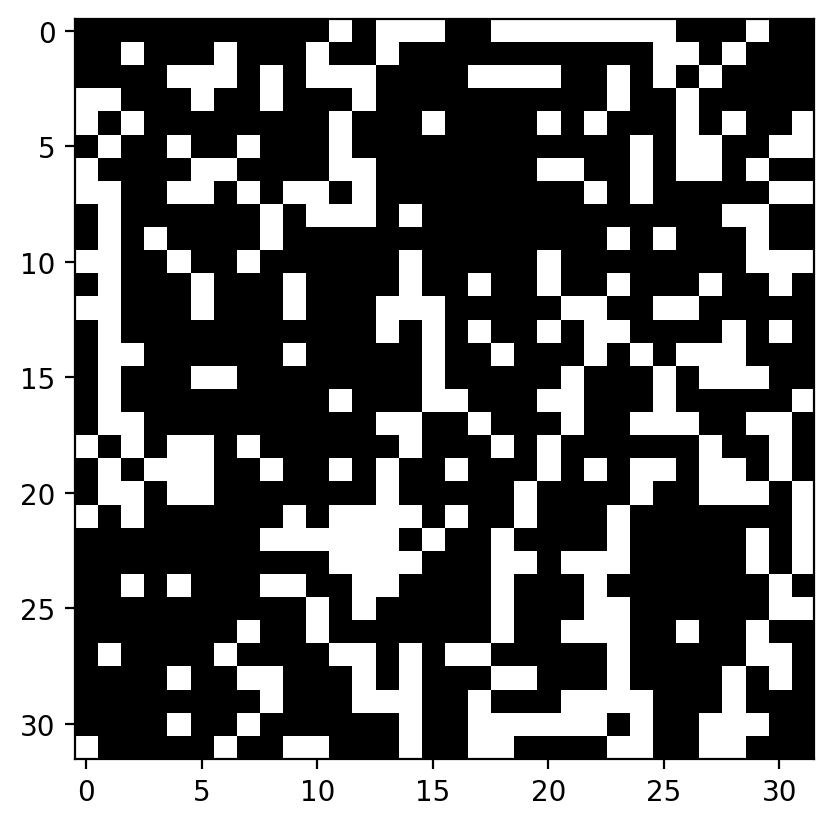

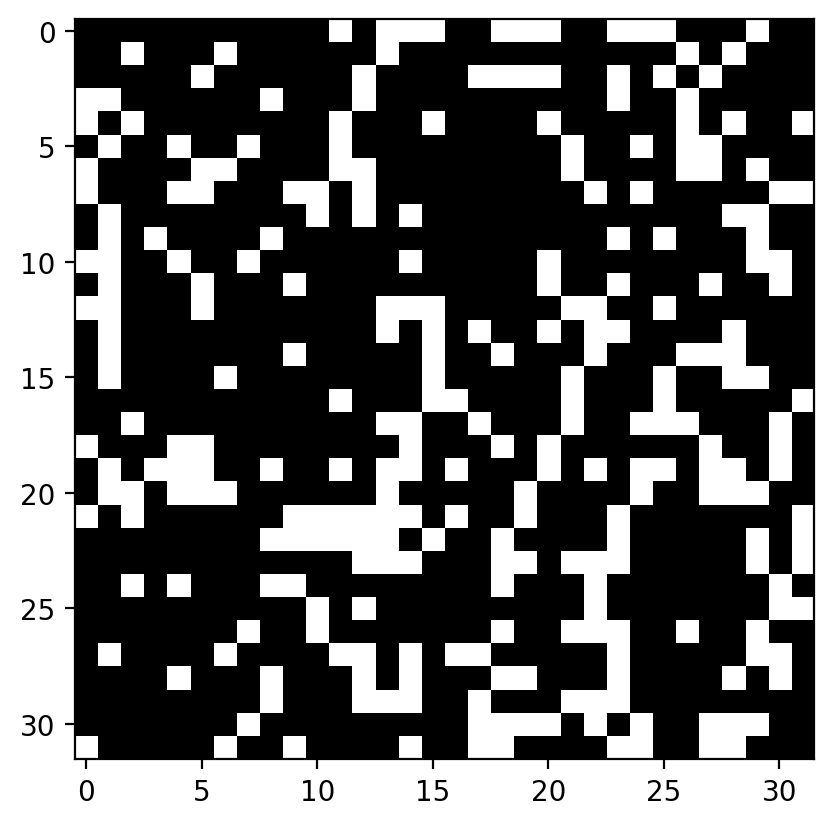

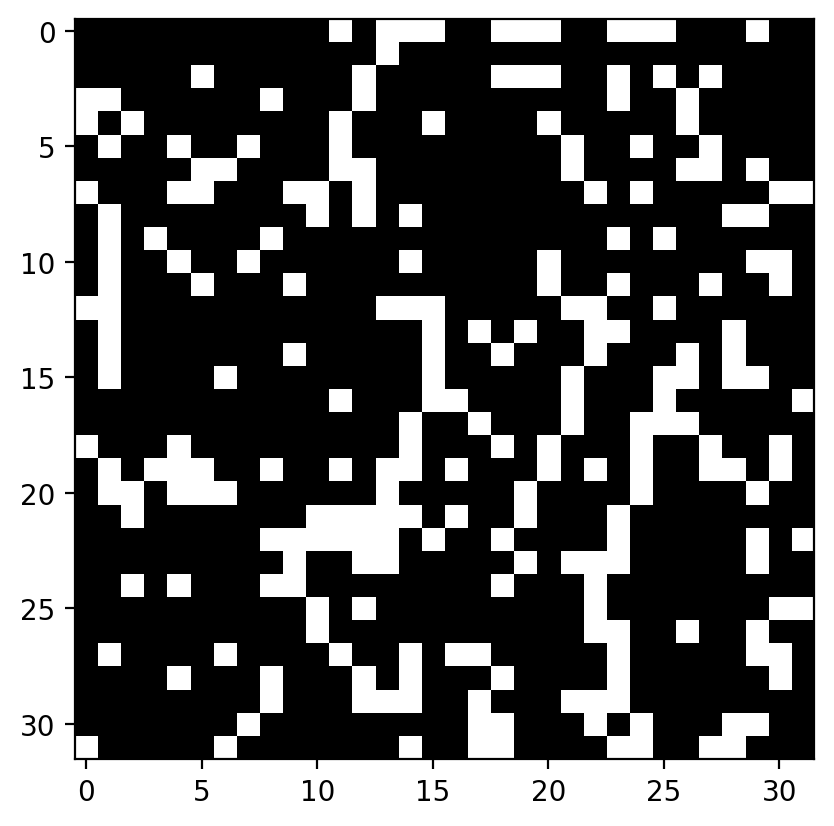

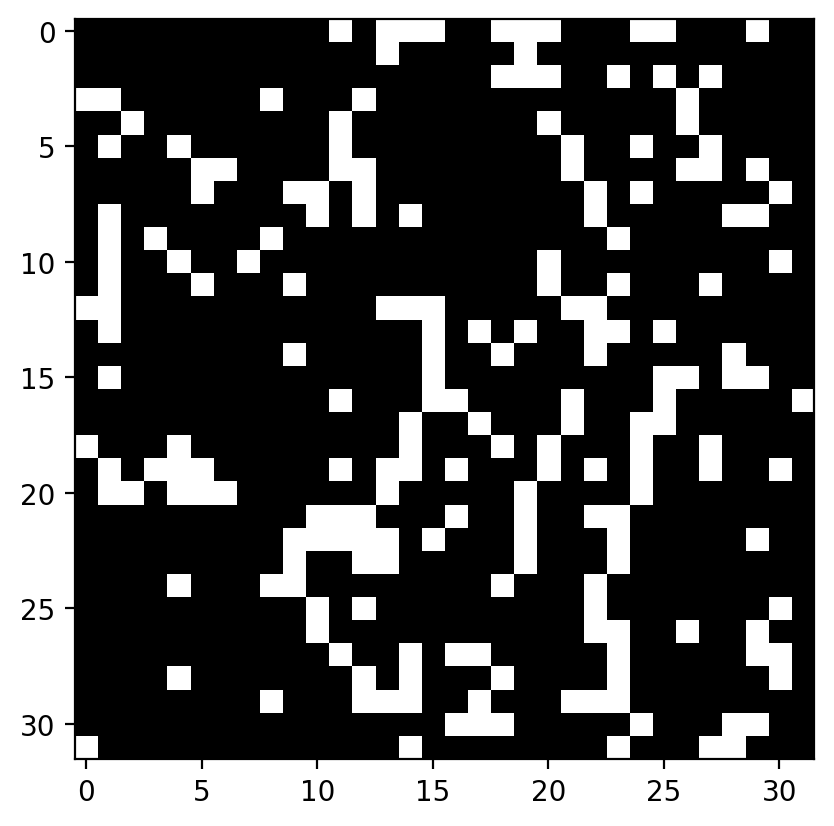

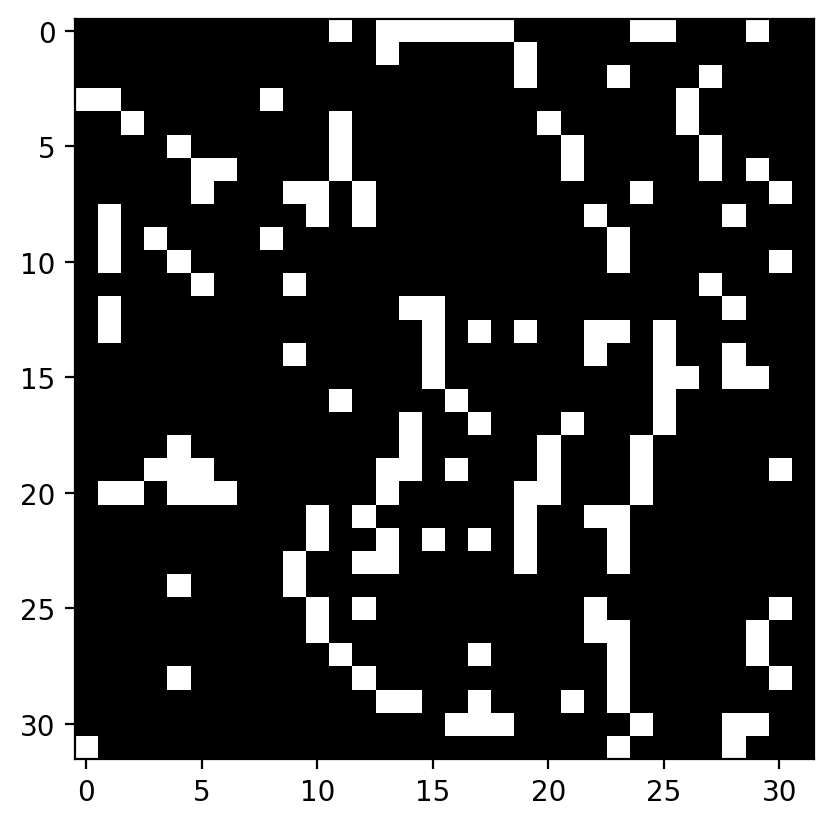

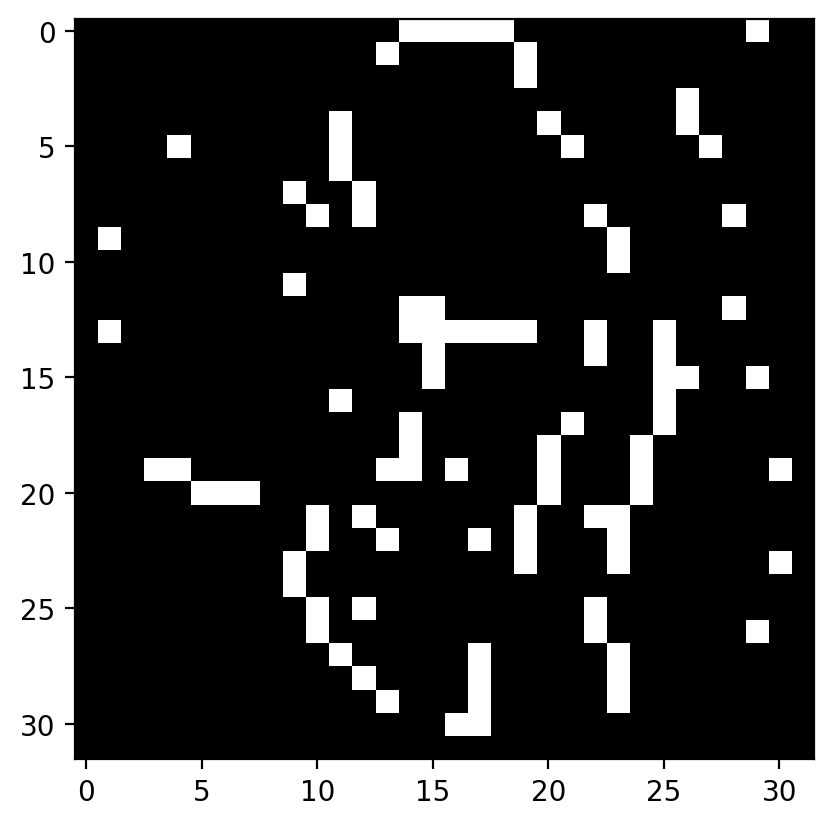

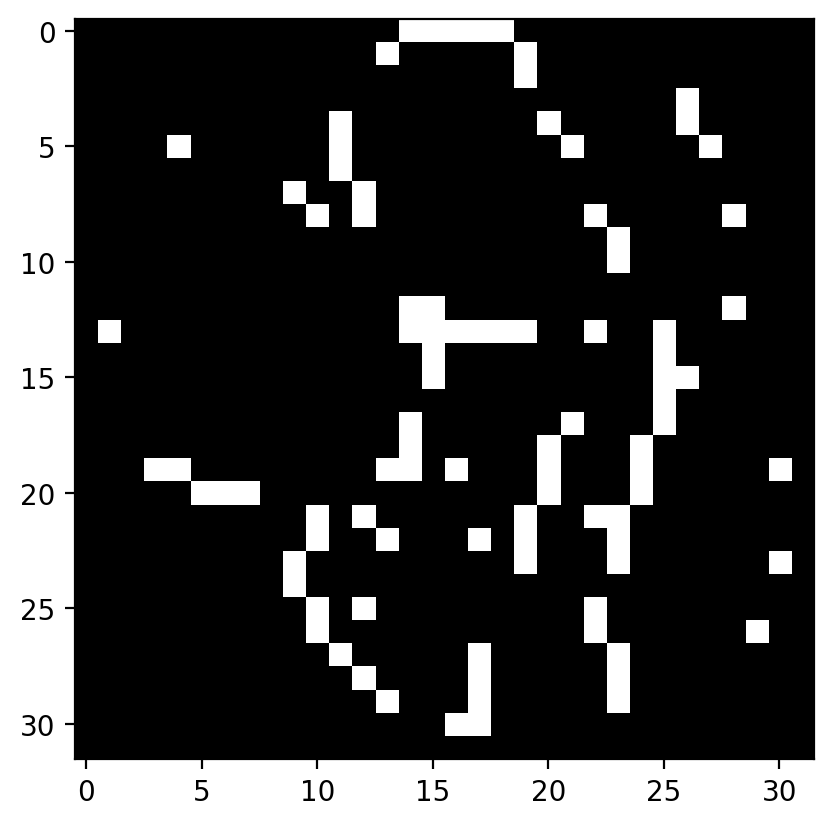

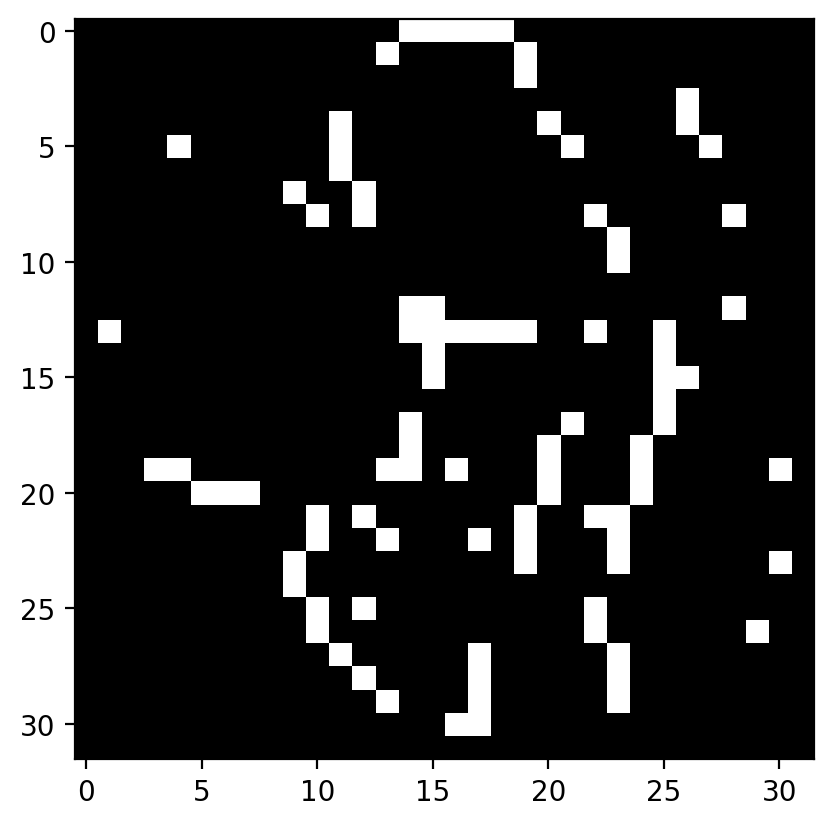

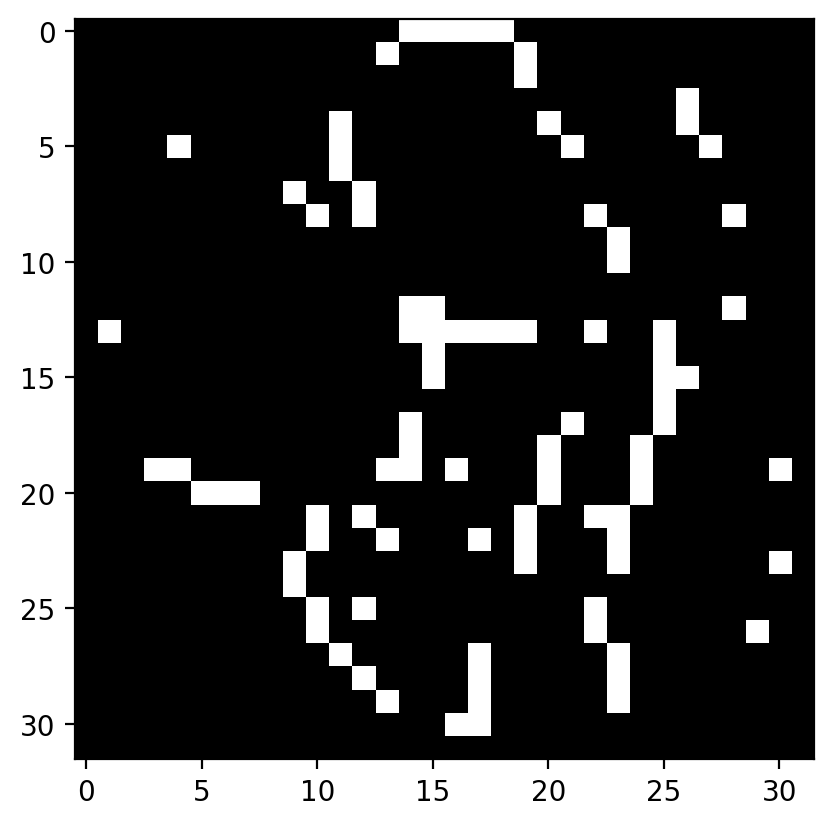

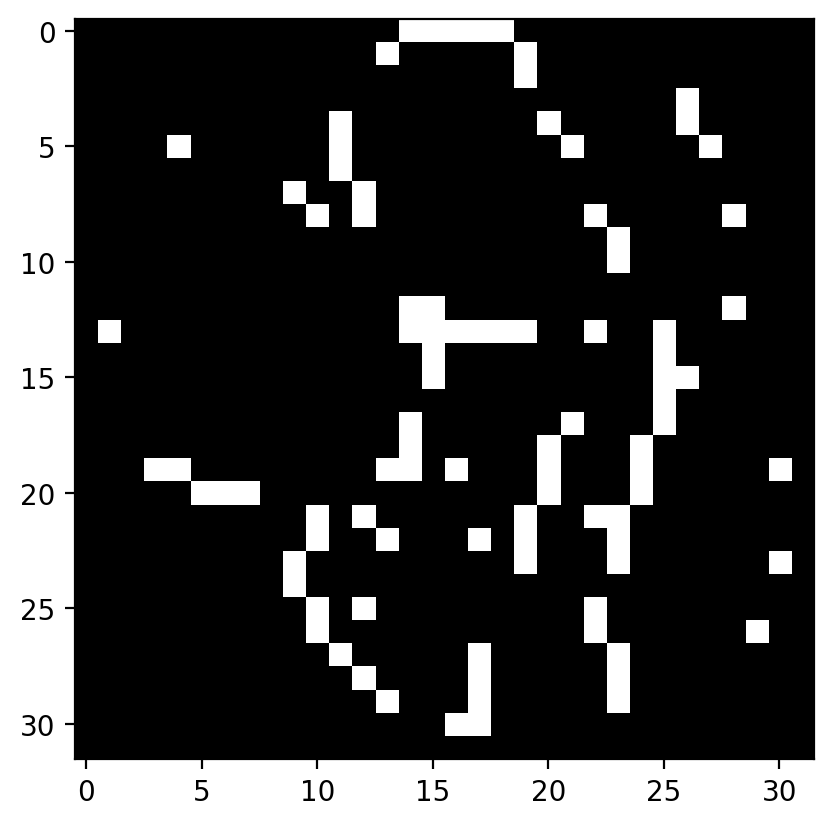

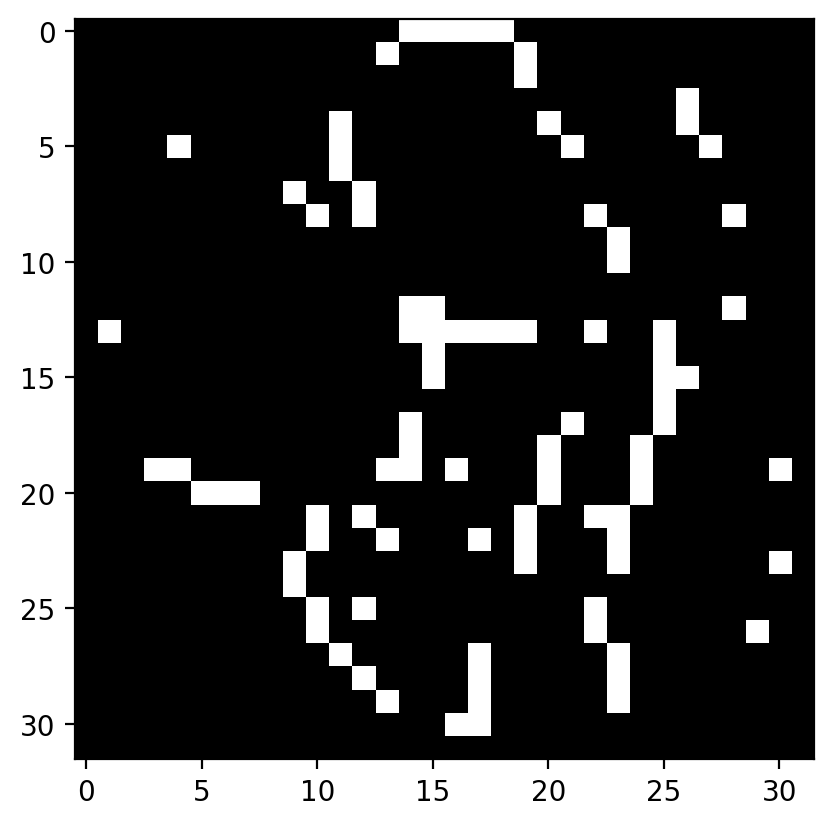

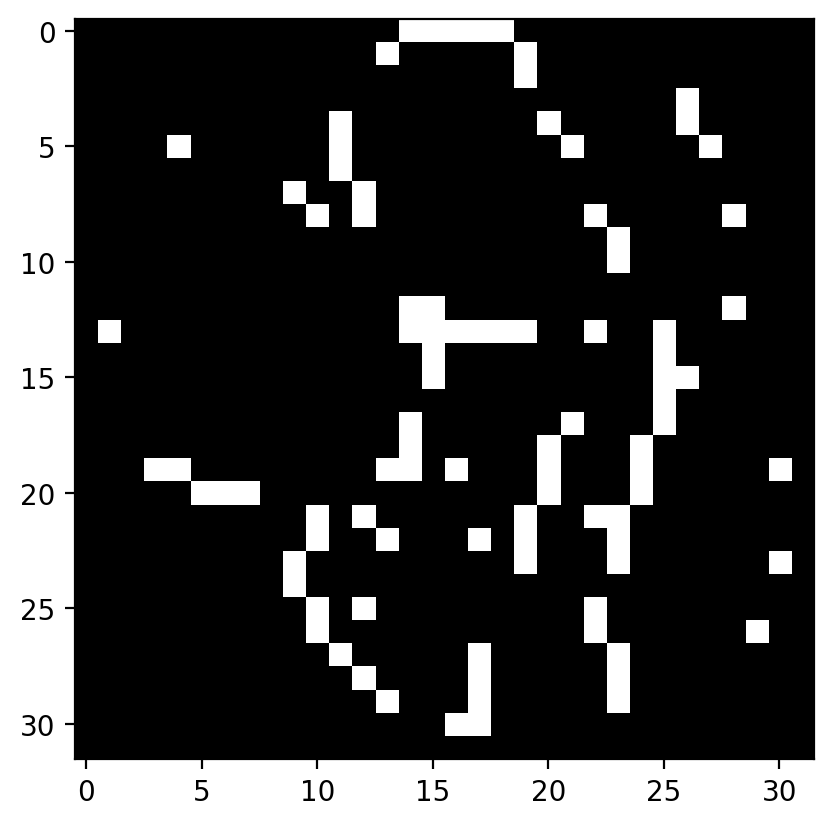

2


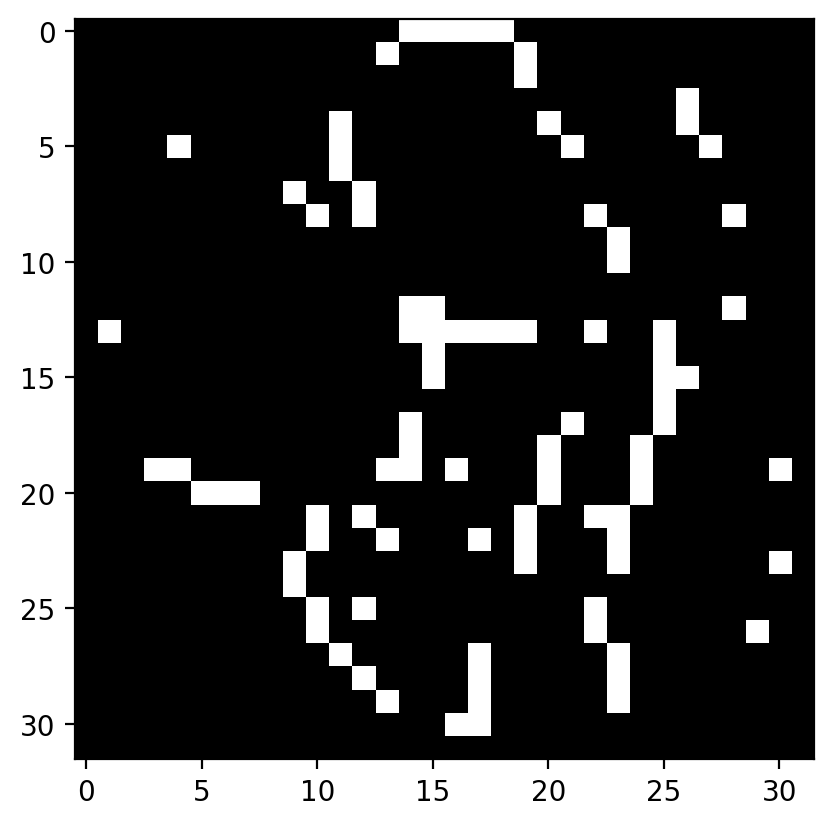

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
The network remembers 0 patterns


In [60]:
#Task 5 1-2-3
def add_pattern(x,W):  #add a single pattern to an already existing network
    N=len(x)
    for i in range(N):
            for j in range(N):
                W[i,j]+=x[i]*x[j]/N
    return W
patterns=np.array([p1,p2,p3,p4])
W=hebbiantraining(patterns)
noisy_p1=add_noise(p1,0.2)
noisy_p2=add_noise(p2,0.2)
noisy_p3=add_noise(p3,0.2)
noisy_p4=add_noise(p4,0.2)
noisy_p5=add_noise(p5,0.2)
noisy_p6=add_noise(p6,0.2)
noisy_p7=add_noise(p7,0.2)

def recalled_patterns(patterns,noisy_patterns,W):
     N=len(patterns[:,0])
     count=0
     for i in range(N):
          if np.array_equal(recall(noisy_patterns[i],W),patterns[i]):
             count+=1
     return count 

showpicture(seqrecall(noisy_p1,W))
noisy_patterns=np.array([noisy_p1,noisy_p2,noisy_p3,noisy_p4])
print(f"The network remembers {recalled_patterns(patterns,noisy_patterns,W)} patterns") # just adding p4 makes the network forget everything!!!!